In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


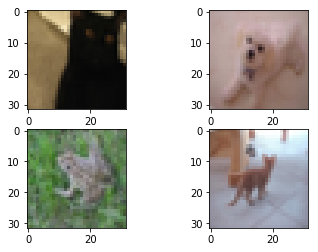

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.005)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.005)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Kera

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 10.4747 - acc: 0.4807 - val_loss: 5.3474 - val_acc: 0.5480
Epoch 2/100
 - 4s - loss: 3.3696 - acc: 0.5729 - val_loss: 3.0052 - val_acc: 0.3983
Epoch 3/100
 - 4s - loss: 1.8059 - acc: 0.6003 - val_loss: 1.5859 - val_acc: 0.5610
Epoch 4/100
 - 4s - loss: 1.3834 - acc: 0.6241 - val_loss: 1.3228 - val_acc: 0.5767
Epoch 5/100
 - 4s - loss: 1.2143 - acc: 0.6408 - val_loss: 1.1184 - val_acc: 0.6497
Epoch 6/100
 - 4s - loss: 1.1620 - acc: 0.6650 - val_loss: 1.2724 - val_acc: 0.6183
Epoch 7/100
 - 4s - loss: 1.1180 - acc: 0.6674 - val_loss: 1.4641 - val_acc: 0.5487
Epoch 8/100
 - 4s - loss: 1.1172 - acc: 0.6839 - val_loss: 1.0781 - val_acc: 0.6683
Epoch 9/100
 - 4s - loss: 1.0774 - acc: 0.6864 - val_loss: 1.2026 - val_acc: 0.6657
Epoch 10/100
 - 4s - loss: 1.0467 - acc: 0.7040 - val_loss: 1.0688 - val_acc: 0.6840
Epoch 11/100
 - 4s - loss: 1.0326 - acc: 0.7222 - val_loss: 1.4248 - val_acc: 0.5930
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2239 - acc: 0.9744 - val_loss: 1.5909 - val_acc: 0.7073
Epoch 98/100
 - 4s - loss: 0.2017 - acc: 0.9773 - val_loss: 1.5643 - val_acc: 0.7177
Epoch 99/100
 - 4s - loss: 0.2009 - acc: 0.9781 - val_loss: 1.6999 - val_acc: 0.6893
Epoch 100/100
 - 4s - loss: 0.1978 - acc: 0.9772 - val_loss: 1.4418 - val_acc: 0.7077
3000/3000 [==============================] - 1s 178us/step

Test Accuracy: 0.7943


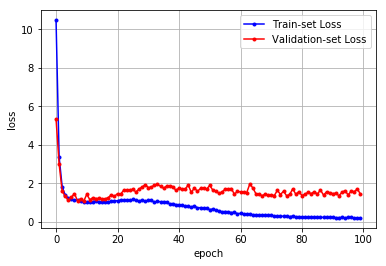

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 10.6579 - acc: 0.4891 - val_loss: 5.5369 - val_acc: 0.5743
Epoch 2/100
 - 4s - loss: 3.5343 - acc: 0.5907 - val_loss: 2.2528 - val_acc: 0.6063
Epoch 3/100
 - 4s - loss: 1.8453 - acc: 0.6041 - val_loss: 1.4780 - val_acc: 0.6263
Epoch 4/100
 - 4s - loss: 1.3743 - acc: 0.6288 - val_loss: 1.3609 - val_acc: 0.5903
Epoch 5/100
 - 4s - loss: 1.2454 - acc: 0.6466 - val_loss: 1.2400 - val_acc: 0.6167
Epoch 6/100
 - 4s - loss: 1.1906 - acc: 0.6592 - val_loss: 1.1188 - val_acc: 0.6393
Epoch 7/100
 - 4s - loss: 1.1211 - acc: 0.6704 - val_loss: 1.1814 - val_acc: 0.6443
Epoch 8/100
 - 4s - loss: 1.0959 - acc: 0.6833 - val_loss: 1.1011 - val_acc: 0.6703
Epoch 9/100
 - 4s - loss: 1.1040 - acc: 0.6918 - val_loss: 1.0740 - val_acc: 0.6777
Epoch 10/100
 - 4s - loss: 1.0548 - acc: 0.6926 - val_loss: 1.0763 - val_acc: 0.6617
Epoch 11/100
 - 4s - loss: 1.0405 - acc: 0.7110 - val_loss: 1.1401 - val_acc: 0.6563
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2027 - acc: 0.9771 - val_loss: 1.4536 - val_acc: 0.7260
Epoch 98/100
 - 4s - loss: 0.2150 - acc: 0.9731 - val_loss: 1.4219 - val_acc: 0.7070
Epoch 99/100
 - 4s - loss: 0.2120 - acc: 0.9739 - val_loss: 1.4057 - val_acc: 0.7210
Epoch 100/100
 - 4s - loss: 0.1987 - acc: 0.9787 - val_loss: 1.3625 - val_acc: 0.7130
3000/3000 [==============================] - 0s 166us/step

Test Accuracy: 0.8123


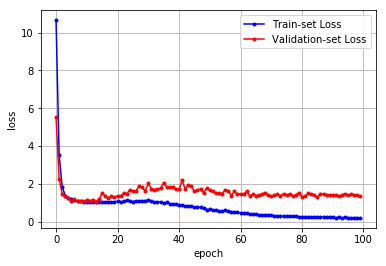

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 10.7570 - acc: 0.4913 - val_loss: 5.5745 - val_acc: 0.5713
Epoch 2/100
 - 4s - loss: 3.5342 - acc: 0.5807 - val_loss: 2.1393 - val_acc: 0.5970
Epoch 3/100
 - 4s - loss: 1.7805 - acc: 0.6078 - val_loss: 1.4656 - val_acc: 0.6200
Epoch 4/100
 - 4s - loss: 1.3654 - acc: 0.6301 - val_loss: 1.3034 - val_acc: 0.6160
Epoch 5/100
 - 4s - loss: 1.2309 - acc: 0.6389 - val_loss: 1.2295 - val_acc: 0.6227
Epoch 6/100
 - 4s - loss: 1.1515 - acc: 0.6626 - val_loss: 1.1768 - val_acc: 0.6397
Epoch 7/100
 - 4s - loss: 1.1137 - acc: 0.6742 - val_loss: 1.1564 - val_acc: 0.6587
Epoch 8/100
 - 4s - loss: 1.0740 - acc: 0.6969 - val_loss: 1.0835 - val_acc: 0.6600
Epoch 9/100
 - 4s - loss: 1.0366 - acc: 0.7028 - val_loss: 1.2313 - val_acc: 0.6287
Epoch 10/100
 - 4s - loss: 1.0235 - acc: 0.7158 - val_loss: 1.0613 - val_acc: 0.6790
Epoch 11/100
 - 4s - loss: 1.0547 - acc: 0.7271 - val_loss: 1.1020 - val_acc: 0.6843
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2012 - acc: 0.9764 - val_loss: 1.4724 - val_acc: 0.7093
Epoch 98/100
 - 4s - loss: 0.2357 - acc: 0.9707 - val_loss: 1.3305 - val_acc: 0.7320
Epoch 99/100
 - 4s - loss: 0.2068 - acc: 0.9756 - val_loss: 1.3278 - val_acc: 0.7110
Epoch 100/100
 - 4s - loss: 0.1988 - acc: 0.9774 - val_loss: 1.4614 - val_acc: 0.7030
3000/3000 [==============================] - 1s 170us/step

Test Accuracy: 0.7743


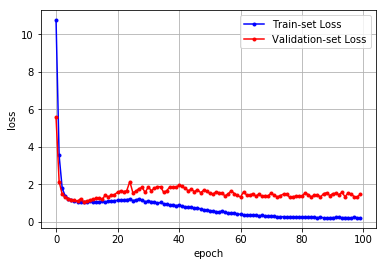

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 10.5473 - acc: 0.4952 - val_loss: 5.3766 - val_acc: 0.5827
Epoch 2/100
 - 4s - loss: 3.4329 - acc: 0.5858 - val_loss: 2.1694 - val_acc: 0.5987
Epoch 3/100
 - 4s - loss: 1.7861 - acc: 0.6103 - val_loss: 1.5306 - val_acc: 0.6087
Epoch 4/100
 - 4s - loss: 1.3986 - acc: 0.6317 - val_loss: 1.3042 - val_acc: 0.5883
Epoch 5/100
 - 4s - loss: 1.2475 - acc: 0.6478 - val_loss: 1.1582 - val_acc: 0.6447
Epoch 6/100
 - 4s - loss: 1.2042 - acc: 0.6609 - val_loss: 1.3125 - val_acc: 0.6313
Epoch 7/100
 - 4s - loss: 1.1145 - acc: 0.6738 - val_loss: 1.2390 - val_acc: 0.6313
Epoch 8/100
 - 4s - loss: 1.1107 - acc: 0.6819 - val_loss: 1.1121 - val_acc: 0.6710
Epoch 9/100
 - 4s - loss: 1.0821 - acc: 0.7011 - val_loss: 1.1114 - val_acc: 0.6773
Epoch 10/100
 - 4s - loss: 1.0798 - acc: 0.7098 - val_loss: 1.2043 - val_acc: 0.6617
Epoch 11/100
 - 4s - loss: 1.0744 - acc: 0.7141 - val_loss: 1.1824 - val_acc: 0.6527
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2370 - acc: 0.9708 - val_loss: 1.4948 - val_acc: 0.7093
Epoch 98/100
 - 4s - loss: 0.1982 - acc: 0.9796 - val_loss: 1.4383 - val_acc: 0.7153
Epoch 99/100
 - 4s - loss: 0.2083 - acc: 0.9751 - val_loss: 1.6163 - val_acc: 0.7047
Epoch 100/100
 - 4s - loss: 0.2324 - acc: 0.9702 - val_loss: 1.5220 - val_acc: 0.7070
3000/3000 [==============================] - 0s 165us/step

Test Accuracy: 0.8097


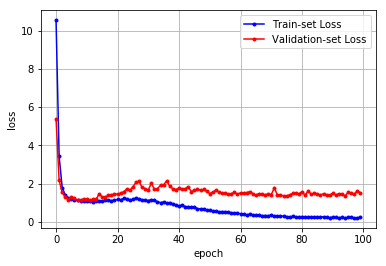

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 10.3269 - acc: 0.4834 - val_loss: 5.2251 - val_acc: 0.5500
Epoch 2/100
 - 4s - loss: 3.2441 - acc: 0.5896 - val_loss: 2.1191 - val_acc: 0.5680
Epoch 3/100
 - 4s - loss: 1.7079 - acc: 0.6139 - val_loss: 1.4075 - val_acc: 0.6247
Epoch 4/100
 - 4s - loss: 1.3416 - acc: 0.6309 - val_loss: 1.2690 - val_acc: 0.6233
Epoch 5/100
 - 4s - loss: 1.1775 - acc: 0.6529 - val_loss: 2.2282 - val_acc: 0.4697
Epoch 6/100
 - 4s - loss: 1.1295 - acc: 0.6626 - val_loss: 1.1771 - val_acc: 0.5987
Epoch 7/100
 - 4s - loss: 1.0772 - acc: 0.6796 - val_loss: 1.1728 - val_acc: 0.6253
Epoch 8/100
 - 4s - loss: 1.0964 - acc: 0.6820 - val_loss: 1.1439 - val_acc: 0.6553
Epoch 9/100
 - 4s - loss: 1.0806 - acc: 0.6940 - val_loss: 1.2599 - val_acc: 0.6453
Epoch 10/100
 - 4s - loss: 1.0249 - acc: 0.7119 - val_loss: 1.0621 - val_acc: 0.6740
Epoch 11/100
 - 4s - loss: 1.0262 - acc: 0.7247 - val_loss: 1.1283 - val_acc: 0.6633
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2068 - acc: 0.9767 - val_loss: 1.4490 - val_acc: 0.7207
Epoch 98/100
 - 4s - loss: 0.2236 - acc: 0.9726 - val_loss: 1.3905 - val_acc: 0.7293
Epoch 99/100
 - 4s - loss: 0.2125 - acc: 0.9760 - val_loss: 1.4190 - val_acc: 0.6843
Epoch 100/100
 - 4s - loss: 0.2097 - acc: 0.9742 - val_loss: 1.5954 - val_acc: 0.6960
3000/3000 [==============================] - 1s 171us/step

Test Accuracy: 0.8017


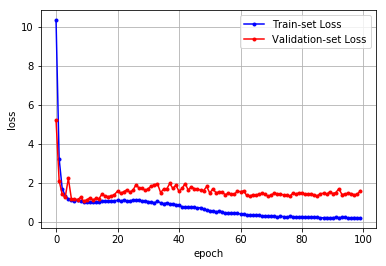

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_6/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [17]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_6/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.73 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99922222 0.99844444 0.99755556 0.99688889 0.99711111]
Validation Acc: [0.73366667 0.73266667 0.73233333 0.727      0.72933333]
Test Acc: [0.81266667 0.79766667 0.81233333 0.806      0.79866667]
[ True  True  True False False]


In [18]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_6/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 24.87%
Ensemble Validation_Accuracy: 75.13%
Ensemble Test_Error: 15.57%
Ensemble Test_Accuracy: 84.43%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_6/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])